In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import matplotlib.patches as patches
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
import matplotlib.animation as animation

# Goal: Pack ASPs into lowest area configuration possible as a function of its radius, $r$ and opening angle, $\psi$. 

In [36]:
class ASP:
    def __init__(self, m_radius, m_theta, rotation=0., xy_pos = (0.,0.), fill=False, linewidth=1., edgecolor='black'):
        self.radius = m_radius
        self.theta = m_theta
        self.xy_pos = xy_pos
        self.rotation = rotation
        self.fill = fill
        self.linewidth = linewidth
        self.edgecolor = edgecolor
        self.width = 2*self.radius
        self.height = 2*self.radius
        
        if m_theta == 0.:
            self.img_patch = patches.Arc(self.xy_pos, width=self.width, height=self.height, edgecolor=self.edgecolor, linewidth=self.linewidth)
            
        else:
            self.img_patch = patches.Arc(self.xy_pos, width=self.width, height=self.height, edgecolor=self.edgecolor, linewidth=self.linewidth, angle = self.rotation, theta1=self.theta/2, theta2=360-self.theta/2)
            
    def move_to(self, x, y):
        self.xy_pos = (x,y)
        
    def rotate(self, degrees):
        self.rotation = (self.rotation + degrees)%360
        
class Circle:
    def __init__(self, m_radius, xy_pos):
        self.radius = m_radius
        self.xy_pos = xy_pos
        self.circ_points = [(self.radius*np.cos(theta) + self.xy_pos[0], self.radius*np.sin(theta) + self.xy_pos[1]) for theta in np.arange(0,360,1.)]

[(1.0, 0.0), (0.5403023058681398, 0.8414709848078965), (-0.4161468365471424, 0.9092974268256817), (-0.9899924966004454, 0.1411200080598672), (-0.6536436208636119, -0.7568024953079282), (0.28366218546322625, -0.9589242746631385), (0.960170286650366, -0.27941549819892586), (0.7539022543433046, 0.6569865987187891), (-0.14550003380861354, 0.9893582466233818), (-0.9111302618846769, 0.4121184852417566), (-0.8390715290764524, -0.5440211108893698), (0.004425697988050785, -0.9999902065507035), (0.8438539587324921, -0.5365729180004349), (0.9074467814501962, 0.4201670368266409), (0.1367372182078336, 0.9906073556948704), (-0.7596879128588213, 0.6502878401571168), (-0.9576594803233847, -0.2879033166650653), (-0.27516333805159693, -0.9613974918795568), (0.6603167082440802, -0.7509872467716762), (0.9887046181866692, 0.14987720966295234), (0.40808206181339196, 0.9129452507276277), (-0.5477292602242684, 0.8366556385360561), (-0.9999608263946371, -0.008851309290403876), (-0.5328330203333975, -0.84622040

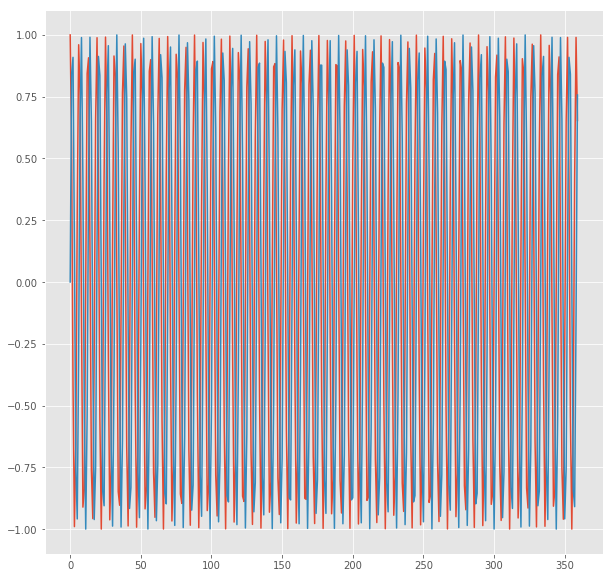

In [39]:
circ = Circle(1, (0,0))
print(circ.circ_points)
#print(np.shape(np.transpose(circ.circ_points)))
#plt.plot(np.transpose(circ.circ_points[0]), np.transpose(circ.circ_points[1]))
plt.plot(circ.circ_points)

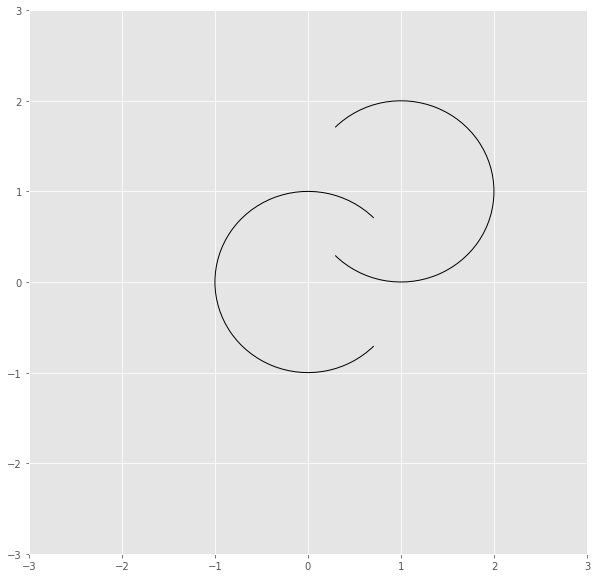

In [12]:
#circ = ASP(1, 90, rotation = 100)
#circ = np.array([ASP(1, 90, rotation = i) for i in range(360)])
circ = np.array([ASP(1, 90, xy_pos=(0.,0.)), ASP(1, 90, rotation=180, xy_pos=(1.,1.))])
fig,ax = plt.subplots(1)
for i in range(len(circ)):
    ax.add_patch(circ[i].img_patch)
    
ax.clear
plt.ylim(-circ[0].radius * 3, circ[0].radius * 3)
plt.xlim(-circ[0].radius * 3, circ[0].radius * 3)
plt.show()

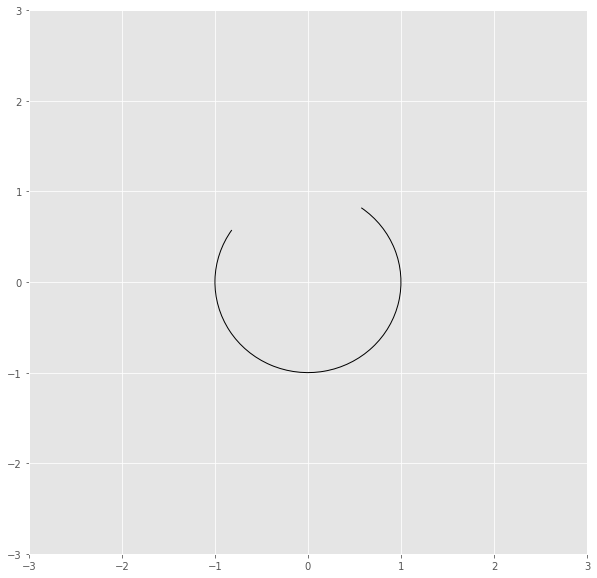

In [72]:
fig,ax = plt.subplots(1)
ax.add_patch(circ.img_patch)
plt.ylim(-(circ.radius * 3), circ.radius * 3)
plt.xlim(-(circ.radius * 3), circ.radius * 3)
plt.show()